In [229]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiDipoleModel
import smtf_utility as util

In [230]:
def percentage(input, predicted):
    adiff = abs(input-predicted)
    delta = 0
    if input > adiff:
        delta = input - adiff
    else:
        delta = adiff + input
    
    return ((delta/input) * 100)

In [231]:
sim = util.bf_simulator(distances=[1, 1.33, 1.66, 1.99], delta=30, scale=1e9)

xpole = 100
ypole = 200
zpole = -600

sim.add_dipole(0.0, 0, 0, xpole, 0, 0)
sim.add_dipole(0.0, 0, 0, 0, ypole, 0)
sim.add_dipole(0.0, 0, 0, 0, 0, zpole)

In [232]:
positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [233]:
model = MultiDipoleModel(poles=1, lrate=0.5, optimizer='adam', loss='mse', scale=1e9, early_stop=False, target_stop=.0002)
test_epochs = 500

In [234]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 483434000.0
epoch  1 --- Loss --- 449840260.0
epoch  2 --- Loss --- 418183520.0
epoch  3 --- Loss --- 388681000.0
epoch  4 --- Loss --- 361340300.0
epoch  5 --- Loss --- 336057150.0
epoch  6 --- Loss --- 312696640.0
epoch  7 --- Loss --- 291116100.0
epoch  8 --- Loss --- 271173950.0
epoch  9 --- Loss --- 252733980.0
epoch  10 --- Loss --- 235667340.0
epoch  11 --- Loss --- 219853840.0
epoch  12 --- Loss --- 205182270.0
epoch  13 --- Loss --- 191550690.0
epoch  14 --- Loss --- 178866140.0
epoch  15 --- Loss --- 167044580.0
epoch  16 --- Loss --- 156009980.0
epoch  17 --- Loss --- 145694320.0
epoch  18 --- Loss --- 136036660.0
epoch  19 --- Loss --- 126982590.0
epoch  20 --- Loss --- 118483890.0
epoch  21 --- Loss --- 110497816.0
epoch  22 --- Loss --- 102986270.0
epoch  23 --- Loss --- 95915890.0
epoch  24 --- Loss --- 89257180.0
epoch  25 --- Loss --- 82983950.0
epoch  26 --- Loss --- 77073100.0
epoch  27 --- Loss --- 71503944.0
epoch  28 --- Loss --- 66258084.0
e

In [235]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 2.360508942604065 minutes


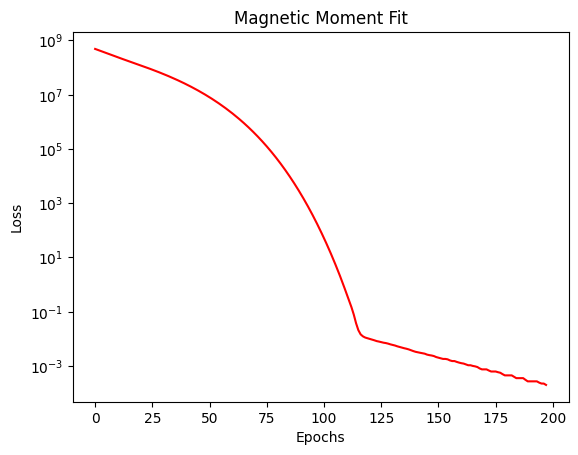

In [236]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [237]:
print("Predicted")
print(model.dipole())
print("Input")
print([[xpole, ypole, zpole]])

Predicted
[[  99.99999  199.99998 -599.9996 ]]
Input
[[100, 200, -600]]


In [238]:
est = model.dipole()

#x_acc = ((xpole - abs(xpole - est[-1][0]))/xpole) * 100.0
#y_acc = ((ypole - abs(ypole - est[-1][1]))/ypole) * 100.0
#z_acc = ((zpole - abs(zpole - est[-1][2]))/zpole) * 100.0
x_acc = percentage( xpole, est[-1][0])
y_acc = percentage(ypole, est[-1][1])
z_acc = percentage(zpole, est[-1][2])
print("Percentage Accuracy X-axis", x_acc)
print("Percentage Accuracy Y-axis", y_acc)
print("Percentage Accuracy Z-axis", z_acc)

print("********************************")
overall_acc = (x_acc + y_acc + z_acc)/3
print("Average Accuracy: ", overall_acc)



Percentage Accuracy X-axis 99.99999237060547
Percentage Accuracy Y-axis 99.99999237060547
Percentage Accuracy Z-axis 99.9999287923177
********************************
Average Accuracy:  99.99997117784288
